 Overlap between n04243546 and n04243546 in image ILSVRC2012_val_00000857.JPEG: percent: 0.04497342269470765
 Overlap between n04243546 and n04243546 in image ILSVRC2012_val_00000857.JPEG: percent: 0.0
 Overlap between n04243546 and n04243546 in image ILSVRC2012_val_00000857.JPEG: percent: 0.0
 Overlap between n04243546 and n04243546 in image ILSVRC2012_val_00000857.JPEG: percent: 0.0
 Overlap between n04243546 and n04243546 in image ILSVRC2012_val_00000857.JPEG: percent: 0.0
 Overlap between n04243546 and n04243546 in image ILSVRC2012_val_00000857.JPEG: percent: 0.0
 Overlap between n01943899 and n01943899 in image ILSVRC2012_val_00020298.JPEG: percent: 0.0
 Overlap between n01943899 and n01943899 in image ILSVRC2012_val_00020298.JPEG: percent: 0.22980573805359927
 Overlap between n01943899 and n01943899 in image ILSVRC2012_val_00020298.JPEG: percent: 0.0
 Overlap between n01943899 and n01943899 in image ILSVRC2012_val_00020298.JPEG: percent: 0.0
 Overlap between n01943899 and n019438

 Overlap between n02018207 and n02018207 in image ILSVRC2012_val_00046599.JPEG: percent: 0.0


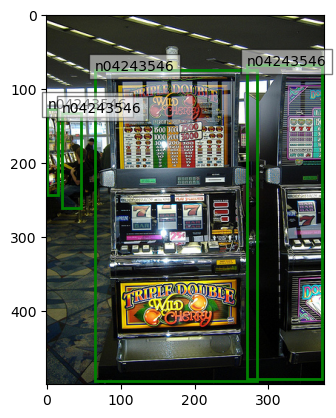

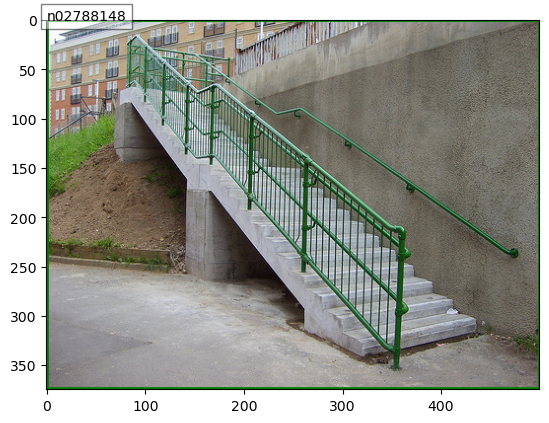

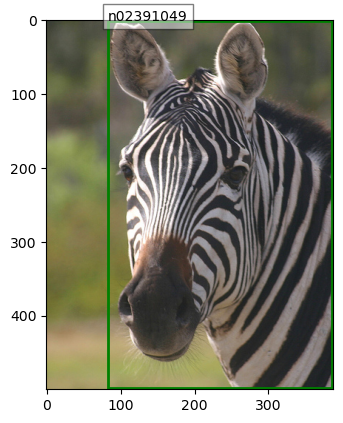

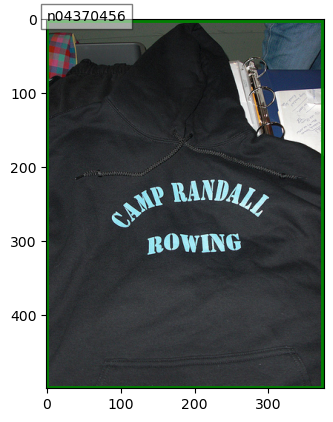

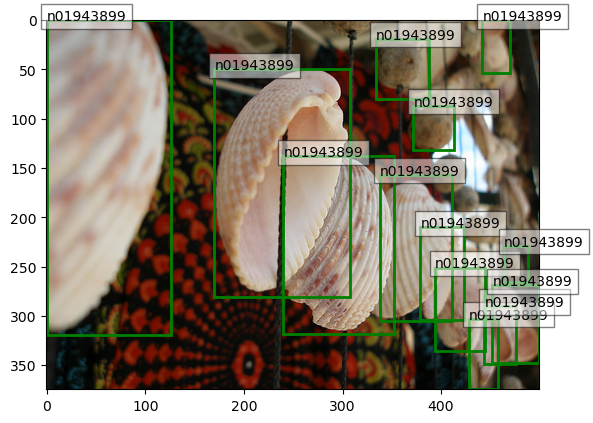

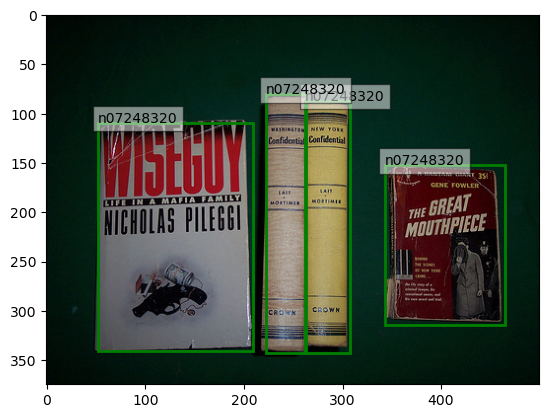

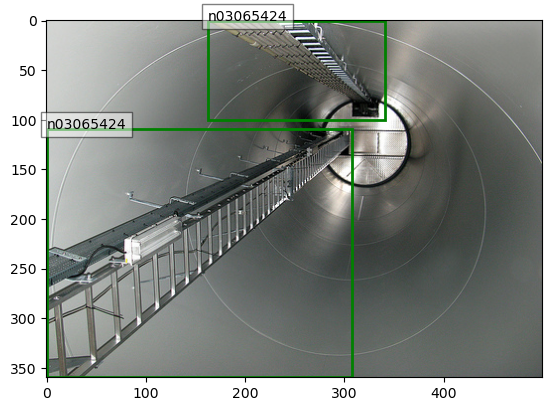

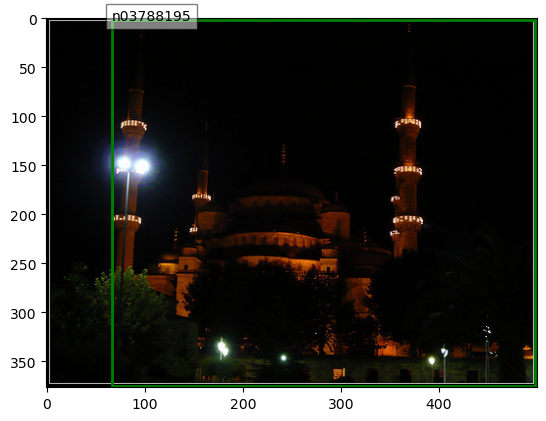

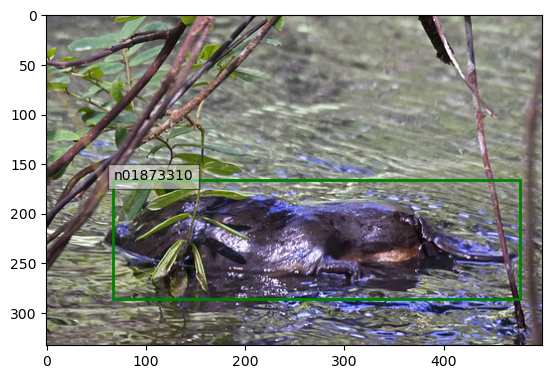

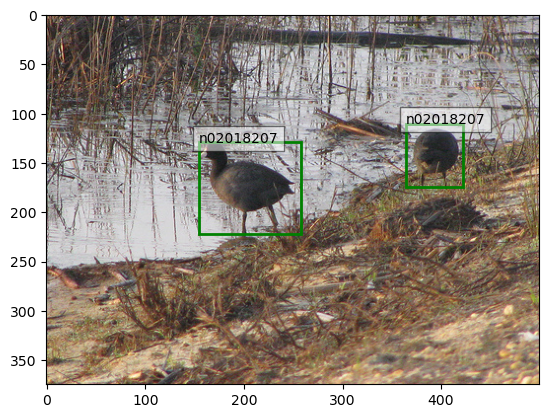

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from lxml import etree
from PIL import Image, ImageDraw

def parse_annotations(annotation_file):
    tree = etree.parse(annotation_file)
    targets = [(obj.find('name').text, tuple(map(int, [bbox.find(f).text for f in ['xmin', 'ymin', 'xmax', 'ymax']]))) for obj in tree.findall('object')]
    return targets

def draw_bounding_boxes(image, targets):
    draw = ImageDraw.Draw(image)
    for obj_name, (x_min, y_min, x_max, y_max) in targets:
        draw.rectangle([(x_min, y_min), (x_max, y_max)], outline='red')
        draw.text((x_min, y_min), obj_name, fill='red')
    return image

def compute_overlap_percentage(box1, box2):
    def calculate_area(box):
        return (box[2] - box[0]) * (box[3] - box[1])

    area1 = calculate_area(box1)
    area2 = calculate_area(box2)

    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    intersection_area = max(0, x_right - x_left) * max(0, y_bottom - y_top)
    union_area = area1 + area2 - intersection_area

    overlap_percentage = intersection_area / union_area if union_area > 0 else 0
    return overlap_percentage

def localize_objects(image_folder, annotation_folder):
    for image_file in os.listdir(image_folder):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            image_path = os.path.join(image_folder, image_file)
            annotation_path = os.path.join(annotation_folder, image_file[:-4] + '.xml')
            print("Image:", image_path)
            print("Annotation:", annotation_path)
            if os.path.exists(annotation_path):
                print("Annotation exists")
                image = Image.open(image_path)
                targets = parse_annotations(annotation_path)
                image_with_boxes = draw_bounding_boxes(image, targets)
                image_with_boxes.show()
                input("Press Enter to continue...")
            else:
                print("Annotation does not exist")

# Parent directory
root_directory = r"C:\Users\Sindhu\Downloads"
images_folder = os.path.join(root_directory, "ILSVRC2012_img_val")
annotations_folder = os.path.join(root_directory, "ILSVRC2012_bbox_val_v3")

localize_objects(images_folder, annotations_folder)

# Select 10 random images
random_images = random.sample(os.listdir(images_folder), 10)

# Plot bounding boxes on random images
for image_file in random_images:
    image_path = os.path.join(images_folder, image_file)
    image = Image.open(image_path)

    annotation_file = os.path.join(annotations_folder, os.path.splitext(image_file)[0] + ".xml")
    if os.path.exists(annotation_file):
        tree = etree.parse(annotation_file)
        root = tree.getroot()

        fig, ax = plt.subplots(1)
        ax.imshow(image)

        boxes = []
        box_names = []
        for obj in root.findall('object'):
            bbox = [int(obj.find('bndbox').find(f).text) for f in ['xmin', 'ymin', 'xmax', 'ymax']]
            x_min, y_min, x_max, y_max = bbox
            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='g', facecolor='none', fill=False)
            ax.add_patch(rect)
            ax.text(x_min, y_min, obj.find('name').text, bbox=dict(facecolor='white', alpha=0.5))
            boxes.append(bbox)
            box_names.append(obj.find('name').text)

    if len(boxes) > 1:
        for i in range(len(boxes)):
            for j in range(i + 1, len(boxes)):
                overlap_percentage = compute_overlap_percentage(boxes[i], boxes[j])
                print(f" Overlap between {box_names[i]} and {box_names[j]} in image {image_file}: percent: {overlap_percentage}")